In [1]:
%pylab inline
#from sympy import *
from scipy.integrate import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
H_0 = 70.0 # km/s.Mpc

# Exercise 

for a cosmology with $\Omega_0 + \Lambda_0 = 1.0$

find $\Delta_{coll}(a_{coll}, \Omega_0, \Delta_i(coll))$

for different values of $0.1<\Omega_i<1.0$

and $a_{coll} = 1$

take $z_i = 1000$

We know that: 

$\Delta_{coll} = \dfrac{\Omega(a_{coll})}{s^3_{coll}} \left (\dfrac{a_{coll}}{a_i} \right )^3 (1 + \Delta_i)$

Using this equation we can find $\Delta_{coll}$. 

Where $a_{i} = \dfrac{1}{1 + z_{i}} = \dfrac{1}{1+1000} = 0.001$

and $s_{coll} =  F s_{ta}$

where $s_{ta} = \dfrac{2}{\sqrt{3}} \left( \dfrac{-b_2}{b_1}\right)^{1/2} cos \left(  \dfrac{\phi - 2\pi}{3} \right)$

where $\phi = arccos [x/(x^2 + y^2)^{1/2}]$ , $x = -9b_1^{1/2}$

$\int \limits_{0}^{a_{coll}} f(a) da = 2 \dfrac{H_0}{H_i}\int \limits_{0}^{s_{ta} } g(s)ds$

In [102]:
def sta(Deltai, Omegai):
    Li = 1-Omegai
    b1 = Li
    b2 = 1 - Omegai*(1+ Deltai) - Li
    b3 = Omegai*(1 + Deltai)
    x = -9*b1**0.5*b3
    y = (3*(-4*b2**3 - 27*b1))
    Phi= arccos(x/(x*x+y*y)**0.5)
    FOO = (2.0/sqrt(3)) * (-b2/b1)**0.5 *cos((Phi-2.*pi)/3.)
    return FOO

def f(a, Omega0):
    L0 = 1 - Omega0
    f = ( 1 + Omega0*(1/a  - 1) + L0*(a**2-1) )**(-0.5)
    return f

def Int_fa(Omega0):
    I = quad(f, 0, 1, args=(Omega0))
    return I

def H(z, Omega0):
    Lambda0 = 1. - Omega0
    return H_0*(Omega0*(1+z)**3 - (Omega0+Lambda0-1)*(1+z)**2 + Lambda0)**0.5

def Omega_z(z,Omega0):
    return Omega0 * (1+z)**3 * (H_0/H(z,Omega0))**2

def Lambda_z(z, Omega0):
    Lambda0=1.-Omega0
    return Lambda0*(H_0/H(z,Omega0))**2

def g_s(s,z,Omega0, Deltai):
    Omegai=Omega_z(z, Omega0)
    Lambdai=Lambda_z(z, Omega0)
    return (1+ Omegai*(1/s-1)*(1+Deltai)+Lambdai*(s*s - 1))**-0.5

def deltaicrit(Omegai):
    Lambdai = 1-Omegai
    q = (Lambdai*(8-Lambdai**2 + 20*Lambdai + 8*(1 - Lambdai)**(3/2.)))**(1/3.)
    p = 1 + 5/4. * Lambdai + 3*Lambdai*(8+Lambdai)/4*q + 3*q / 4.
    return 1/Omegai*p - 1

In [43]:
STA = sta(Delta__i,0.9999,0.0001)

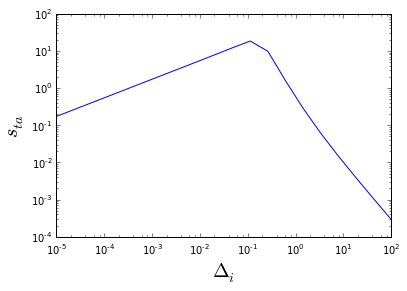

In [44]:
plot(Delta__i,STA)
xscale("log")
yscale("log")
xlabel(r"$\Delta_i$", fontsize=20)
ylabel(r"$s_{ta}$", fontsize=20)

In [111]:
llblb = Omega_z(1000, 0.01)
deltaicrit(0.9)

2.043812857342479

In [63]:
def Int_Sta_deltai(z, Deltai, Omega0):
    Omegai = Omega_z(z, Omega0)
    
    Integral = quad( g_s, 0.000001, sta(Deltai,Omegai), args=(z,Omega0,Deltai))
    return Integral
                    

In [83]:
Int_Sta_deltai(1000,0.0001,0.7)

# Para valores de Deltai grandes la integral no sirve. Tenemos que buscar primero la cota superior

(3132.738813476071, 1.5613477444276214e-07)

In [97]:
Des = logspace(-8,-2,20)

for Del in Des:
    print Del, Int_Sta_deltai(1000,Del,0.7)[0]


1e-08 3.11140744798
2.06913808111e-08 5.3678330497
4.28133239872e-08 9.2606424915
8.8586679041e-08 15.9765596915
1.83298071083e-07 27.5629378405
3.79269019073e-07 47.5519168382
7.84759970351e-07 82.0373105046
1.62377673919e-06 141.532901819
3.35981828628e-06 244.180660911
6.95192796178e-06 421.297308551
1.43844988829e-05 727.003743202
2.97635144163e-05 1255.15006353
6.15848211066e-05 2170.13770554
0.00012742749857 3768.70048127
0.000263665089873 6635.04032496
0.000545559478117 12241.0544471
0.00112883789168 28917.3577459
0.00233572146909 nan
0.00483293023857 nan
0.01 nan


/homecolab/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:35: RuntimeWarning: invalid value encountered in double_scalars


In [13]:
A = 0.001    # s lower limit
B = 100.0    # s upper limit
x = (A+B)/2

# bisection method
epsilon=1e-9
while (abs(f(x))>epsilon):
#for i in range(10):
    if (f(x)*f(A) > 0  ):
        A = x
        x = (A+B)/2
    else:
        B = x
        x = (A+B)/2
x_0 =x
print x, f(x)

TypeError: f() takes exactly 2 arguments (1 given)